In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random 1500 latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [5]:
#pip install citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

587

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
#The config.py file should be in the same folder as this API_practice.ipynb file

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

## Loop through all the cities in our list.
#for i in range(len(cities)):

    ## Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
    ## Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

#Instead of using two for loops, we can use the enumerate() method 
#as an alternative way to iterate through the list of cities 
#and retrieve both the index, and the city from the list.

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):   #check if the remainder of the index divided by 50 is equal to 0 and and if the index is greater than or equal to 50
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") #removing the blank spaces in the city name and concatenating the city name with +

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavaratti
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | champerico
Processing Record 4 of Set 1 | camacha
Processing Record 5 of Set 1 | sorland
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | hambantota
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 19 of Set 1 | tezu
Processing Record 20 of Set 1 | guajara-mi

Processing Record 36 of Set 4 | ribeira grande
Processing Record 37 of Set 4 | monrovia
Processing Record 38 of Set 4 | chapais
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | bredasdorp
Processing Record 41 of Set 4 | ejido
Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | ust-bolsheretsk
City not found. Skipping...
Processing Record 44 of Set 4 | trinidad
Processing Record 45 of Set 4 | taitung
Processing Record 46 of Set 4 | mildura
Processing Record 47 of Set 4 | aykhal
Processing Record 48 of Set 4 | ribas do rio pardo
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | rio grande
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | tillabery
City not found. Skipping...
Processing Record 4 of Set 5 | san ramon
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | arakhova
City not found. Skipping...
Processing Record 7 of Set 5 | santa

Processing Record 26 of Set 8 | bulgan
Processing Record 27 of Set 8 | whitehorse
Processing Record 28 of Set 8 | ihosy
Processing Record 29 of Set 8 | khor
Processing Record 30 of Set 8 | nelipyno
Processing Record 31 of Set 8 | chimbote
Processing Record 32 of Set 8 | mazulskiy
City not found. Skipping...
Processing Record 33 of Set 8 | guilin
Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | puerto del rosario
Processing Record 36 of Set 8 | kuche
City not found. Skipping...
Processing Record 37 of Set 8 | nishihara
Processing Record 38 of Set 8 | oriximina
Processing Record 39 of Set 8 | el faiyum
City not found. Skipping...
Processing Record 40 of Set 8 | aksarka
Processing Record 41 of Set 8 | valdivia
Processing Record 42 of Set 8 | tasiilaq
Processing Record 43 of Set 8 | manggar
Processing Record 44 of Set 8 | atambua
Processing Record 45 of Set 8 | aguimes
Processing Record 46 of Set 8 | nhulunbuy
Processing Record 47 of Set 8 | ngukurr
City not found. Skip

Processing Record 11 of Set 12 | pevek
Processing Record 12 of Set 12 | guerrero negro
Processing Record 13 of Set 12 | vagur
Processing Record 14 of Set 12 | filimonovo
Processing Record 15 of Set 12 | datong
Processing Record 16 of Set 12 | khormuj
City not found. Skipping...
Processing Record 17 of Set 12 | sarkand
Processing Record 18 of Set 12 | guymon
Processing Record 19 of Set 12 | sterlibashevo
Processing Record 20 of Set 12 | norfolk
Processing Record 21 of Set 12 | baruun-urt
Processing Record 22 of Set 12 | kananga
Processing Record 23 of Set 12 | male
Processing Record 24 of Set 12 | mayo
Processing Record 25 of Set 12 | balabac
Processing Record 26 of Set 12 | tandil
Processing Record 27 of Set 12 | ambilobe
Processing Record 28 of Set 12 | gawler
Processing Record 29 of Set 12 | sitka
Processing Record 30 of Set 12 | port-gentil
Processing Record 31 of Set 12 | udachnyy
Processing Record 32 of Set 12 | evensk
Processing Record 33 of Set 12 | magistralnyy
Processing Recor

In [12]:
# Print the city_data count to confirm sufficient count.
len(city_data)

535

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.5669,72.6420,82.27,66,2,1.52,IN,2021-01-19 16:59:37
1,Champerico,14.3000,-91.9167,86.00,58,0,5.97,GT,2021-01-19 16:59:37
2,Camacha,33.0833,-16.3333,64.40,63,20,5.75,PT,2021-01-19 16:59:37
3,Sorland,67.6670,12.6934,35.60,64,0,16.11,NO,2021-01-19 16:59:38
4,Carnarvon,-24.8667,113.6333,78.80,89,0,16.11,AU,2021-01-19 16:59:38
5,Cherskiy,68.7500,161.3000,-39.68,81,100,6.64,RU,2021-01-19 16:59:38
6,Bluff,-46.6000,168.3333,46.00,86,100,8.99,NZ,2021-01-19 16:59:38
7,Barrow,71.2906,-156.7887,1.40,71,90,23.02,US,2021-01-19 16:59:38
8,Busselton,-33.6500,115.3333,66.63,81,7,5.26,AU,2021-01-19 16:59:39
9,Hermanus,-34.4187,19.2345,72.00,67,12,5.01,ZA,2021-01-19 16:59:39


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2021-01-19 16:59:37,10.5669,72.6420,82.27,66,2,1.52
1,Champerico,GT,2021-01-19 16:59:37,14.3000,-91.9167,86.00,58,0,5.97
2,Camacha,PT,2021-01-19 16:59:37,33.0833,-16.3333,64.40,63,20,5.75
3,Sorland,NO,2021-01-19 16:59:38,67.6670,12.6934,35.60,64,0,16.11
4,Carnarvon,AU,2021-01-19 16:59:38,-24.8667,113.6333,78.80,89,0,16.11
...,...,...,...,...,...,...,...,...,...
530,Evensk,RU,2021-01-19 17:01:34,61.9500,159.2333,-13.65,74,0,11.74
531,Magistralnyy,RU,2021-01-19 17:01:35,56.1725,107.4458,1.53,90,94,4.94
532,Vila Velha,BR,2021-01-19 17:01:35,-20.3297,-40.2925,88.00,55,20,19.57
533,Kysyl-Syr,RU,2021-01-19 17:01:35,63.8986,122.7617,-50.71,74,74,9.04


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#Retrieve the data needed to create scatter plots: latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities. 

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

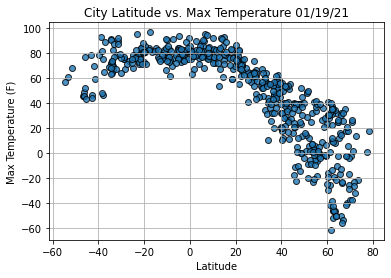

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Use the current date in the title.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

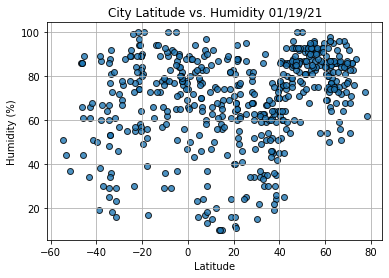

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Use the current date in the title.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

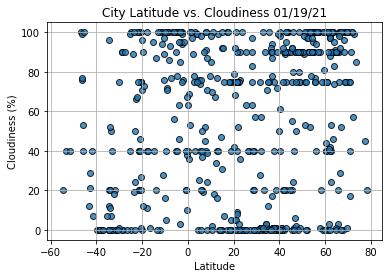

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Use the current date in the title.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

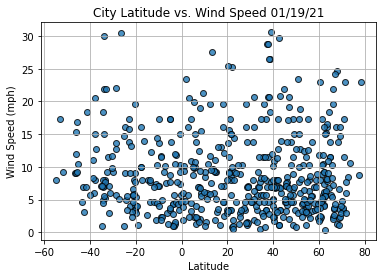

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Use the current date in the title.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [99]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Print the r-value
    print(f"The r-value is: {r_value:.3f}")
    
    # Calculate the regression line "y values" from the slope and intercept.
    #y = mx + b
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [92]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

y = 0.4x + 84.52
The p-value is: 0.000
The r-value is: 0.519


In [41]:
#Present all the information at index 13 of the city_data_df DataFrame
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2021-01-19 16:59:01
Lat                        42.097
Lng                      -79.2353
Max Temp                    28.99
Humidity                       86
Cloudiness                     90
Wind Speed                  17.27
Name: 13, dtype: object

In [42]:
#Get all Northern Hemisphere latitudes (latitudes greater than or equal to 0)
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
530     True
531     True
532    False
533     True
534     True
Name: Lat, Length: 535, dtype: bool

In [43]:
#If we want to return a DataFrame with all data fitting the criteria, for 
#latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. 
#Inside the brackets, we would add the conditional filter 
#city_data_df["Lat"] >= 0 so that our statement would appear as:

city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2021-01-19 16:59:37,10.5669,72.6420,82.27,66,2,1.52
1,Champerico,GT,2021-01-19 16:59:37,14.3000,-91.9167,86.00,58,0,5.97
2,Camacha,PT,2021-01-19 16:59:37,33.0833,-16.3333,64.40,63,20,5.75
3,Sorland,NO,2021-01-19 16:59:38,67.6670,12.6934,35.60,64,0,16.11
5,Cherskiy,RU,2021-01-19 16:59:38,68.7500,161.3000,-39.68,81,100,6.64
...,...,...,...,...,...,...,...,...,...
529,Udachnyy,RU,2021-01-19 17:01:11,66.4167,112.4000,-56.06,56,92,2.64
530,Evensk,RU,2021-01-19 17:01:34,61.9500,159.2333,-13.65,74,0,11.74
531,Magistralnyy,RU,2021-01-19 17:01:35,56.1725,107.4458,1.53,90,94,4.94
533,Kysyl-Syr,RU,2021-01-19 17:01:35,63.8986,122.7617,-50.71,74,74,9.04


In [44]:
#Assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.

# Create Northern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [45]:
#Get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.
#Assign this DataFrame to the variable southern_hemi_df to access the data to perform linear regression.

# Create Southern Hemisphere DataFrame.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

The r-value is: -0.846


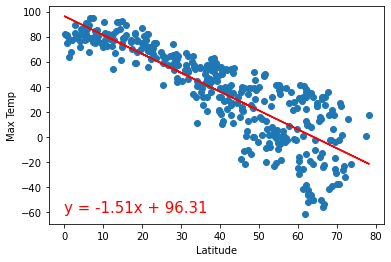

In [101]:
# Linear regression on the Northern Hemisphere (Latitude and Maximum Temperature)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Linear Regression on the Northern Hemisphere for Maximum Temperature"
#plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp',(0,-60))

The r-value is: 0.519


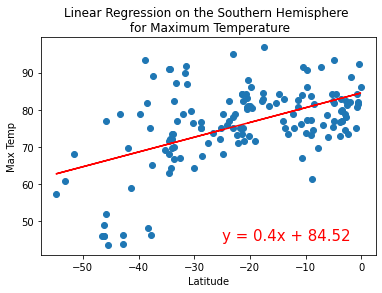

In [100]:
# Linear regression on the Southern Hemisphere (Latitude and Maximum Temperature)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#title = "Linear Regression on the Southern Hemisphere for Maximum Temperature"
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp',(-25,45))

The r-value is: 0.403


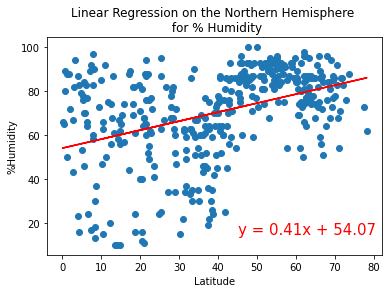

In [107]:
# Linear regression on the Northern Hemisphere (Latitude and Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#title = "Linear Regression on the Northern Hemisphere for % Humidity"
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values, title, '%Humidity',(45,15))

The r-value is: 0.295


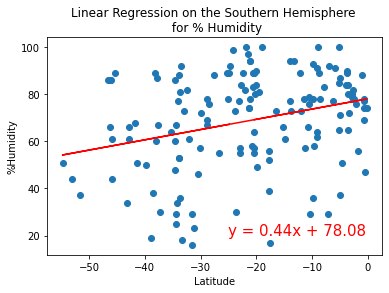

In [113]:
# Linear regression on the Southern Hemisphere (Latitude and Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#title = "Linear Regression on the Southern Hemisphere for % Humidity"
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values, title, '%Humidity',(-25,20))

The r-value is: 0.224


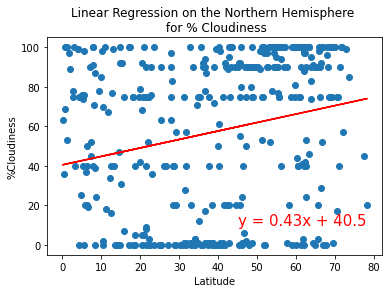

In [117]:
# Linear regression on the Northern Hemisphere (Latitude and Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#title = "Linear Regression on the Northern Hemisphere for % Cloudiness"
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values, title, '%Cloudiness',(45,10))

The r-value is: 0.401


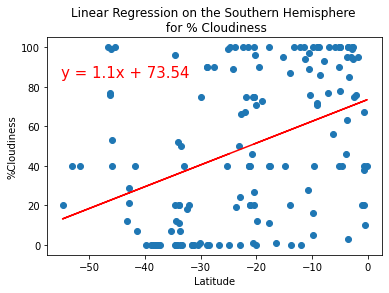

In [118]:
# Linear regression on the Southern Hemisphere (Latitude and Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#title = "Linear Regression on the Southern Hemisphere for % Cloudiness"
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values, title, '%Cloudiness',(-55,85))

The r-value is: -0.003


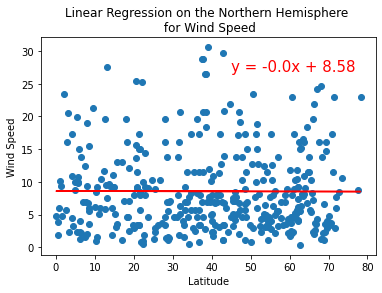

In [123]:
# Linear regression on the Northern Hemisphere (Latitude and Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#title = "Linear Regression on the Northern Hemisphere for Wind Speed"
plt.title(f"Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(45,27))

The r-value is: -0.259


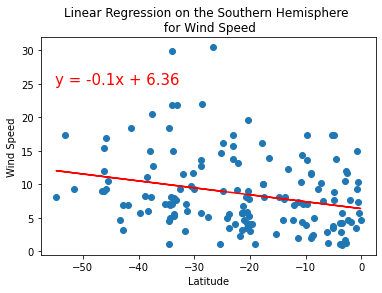

In [125]:
# Linear regression on the Southern Hemisphere (Latitude and Wind Speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#title = "Linear Regression on the Southern Hemisphere for Wind Speed"
plt.title(f"Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(-55,25))